<a href="https://colab.research.google.com/github/miloszpiechota/AI-Systems/blob/main/keras_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Liczba klas: 4
Epoch 1/30
57/57 [==============================] - 1s 6ms/step - loss: 1.4287 - accuracy: 0.2856 - val_loss: 1.3863 - val_accuracy: 0.3000
Epoch 2/30
57/57 [==============================] - 0s 3ms/step - loss: 1.3113 - accuracy: 0.3611 - val_loss: 1.3140 - val_accuracy: 0.3700
Epoch 3/30
57/57 [==============================] - 0s 3ms/step - loss: 1.2344 - accuracy: 0.4111 - val_loss: 1.2275 - val_accuracy: 0.4250
Epoch 4/30
57/57 [==============================] - 0s 3ms/step - loss: 1.1285 - accuracy: 0.4761 - val_loss: 1.0959 - val_accuracy: 0.4800
Epoch 5/30
57/57 [==============================] - 0s 3ms/step - loss: 0.9882 - accuracy: 0.5572 - val_loss: 0.9398 - val_accuracy: 0.5900
Epoch 6/30
57/57 [==============================] - 0s 3ms/step - loss: 0.8422 - accuracy: 0.6511 - val_loss: 0.8005 - val_accuracy: 0.6800
Epoch 7/30
57/57 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.7283 - val_loss: 0.6840 - val_accuracy: 0.7350
Epoch

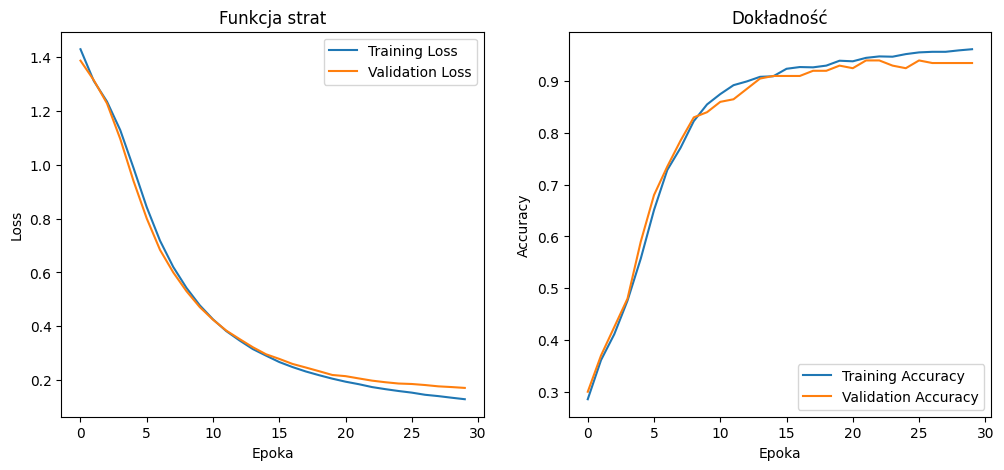

<ipython-input-6-41e2f5ff5b57>:114: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_cv = KerasClassifier(build_fn=build_model, verbose=0)


19/19 [==============================] - 0s 1ms/step
Najlepsza dokładność: 0.7628 uzyskana przy parametrach: {'activation': 'tanh', 'first_neurons': 32, 'learning_rate': 0.01, 'num_layers': 2, 'optimizer': 'adam', 'second_neurons': 24}


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import necessary modules from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# Import necessary modules from Keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

# 1. Load the dataset (CSV file: 'train.csv')
dataset = pd.read_csv('sample_data/train.csv')
# Assume the dataset contains 20 features and a target column (price class)
X = dataset.iloc[:, :20].values
y = dataset.iloc[:, 20].values  # labels as a 1D array

# 2. Normalize feature data
sc = StandardScaler()
X = sc.fit_transform(X)

# 3. Split data into training and test sets (test = 10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Compute the number of classes (assume we have 4 classes)
num_classes = len(np.unique(y))
print(f"Number of classes: {num_classes}")

# 4. Function to build the neural network (using sparse_categorical_crossentropy)
def create_model(num_layers=3, neurons=[16, 12], activation='relu', optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Input layer

    # Add hidden layers
    if num_layers >= 1:
        model.add(Dense(neurons[0], activation=activation))
    if num_layers >= 2:
        model.add(Dense(neurons[1], activation=activation))

    # Output layer – number of neurons = number of classes (4)
    model.add(Dense(num_classes, activation='softmax'))

    # Set optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        opt = optimizer

    # Compile model
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train the default model
model = create_model(num_layers=3, neurons=[16, 12], activation='relu', optimizer='adam', learning_rate=0.001)
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

# Visualize the training process
epochs_range = np.arange(len(history.history['loss']))
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 5. Function to build the model for grid search
def build_model(num_layers=2, first_neurons=16, second_neurons=12, activation='relu', optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))

    if num_layers >= 1:
        model.add(Dense(first_neurons, activation=activation))
    if num_layers >= 2:
        model.add(Dense(second_neurons, activation=activation))

    model.add(Dense(num_classes, activation='softmax'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        opt = optimizer

    # In grid search, we use sparse_categorical_crossentropy loss
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Use KerasClassifier for integration with GridSearchCV
model_cv = KerasClassifier(build_fn=build_model, verbose=0)

param_grid = {
    'num_layers': [1, 2],
    'first_neurons': [16, 32],
    'second_neurons': [12, 24],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.001, 0.01],
    #'epochs': [30, 40],
    #'batch_size': [32, 64]
}

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

grid = GridSearchCV(estimator=model_cv, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[early_stop])

print(f"Best accuracy: {grid_result.best_score_:.4f} achieved with parameters: {grid_result.best_params_}")


In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.12.0

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.11/dist-packages/tensorflow-2.18.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.18.0
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━